In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
csv_name = "features.csv"
dataset = np.loadtxt(csv_name, delimiter=',')

# split data into X and y
X = dataset[:, 1:]
y = dataset[:, 0]

print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (1782, 15564)
<class 'numpy.ndarray'> (1782,)


In [3]:
seed = 2018
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [7]:
model = XGBClassifier()
# eval_set = [(X_test, y_test)]
# model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="error", eval_set=eval_set, verbose=True)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {}".format(accuracy))

accuracy: 0.6621392190152802


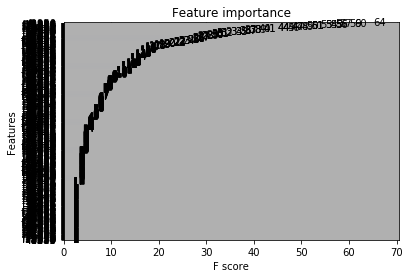

In [10]:
plot_importance(model)
plt.show()